In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

(0, 1)

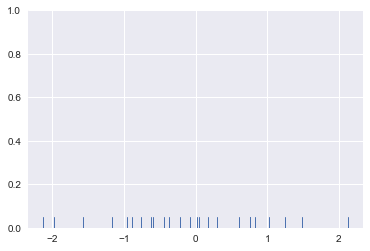

In [2]:
dataset = randn(25)

sns.rugplot(dataset)
plt.ylim(0,1)

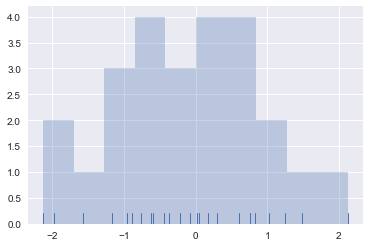

In [3]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

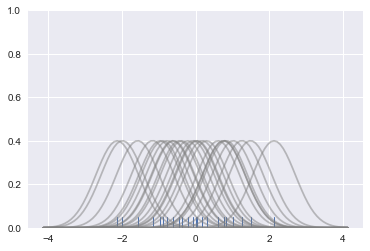

In [4]:
#あとで コードの意味を理解する
sns.rugplot(dataset);

x_min = dataset.min() -2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel*.4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)
    
plt.ylim(0,1)

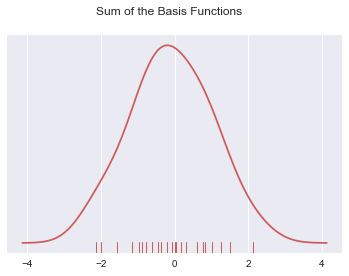

In [5]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset, c='indianred')

plt.yticks([])

plt.suptitle("Sum of the Basis Functions")

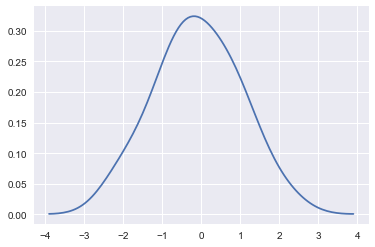

In [6]:
sns.kdeplot(dataset)

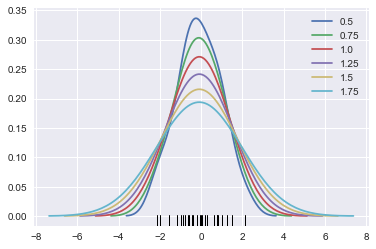

In [10]:
sns.rugplot(dataset,color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)

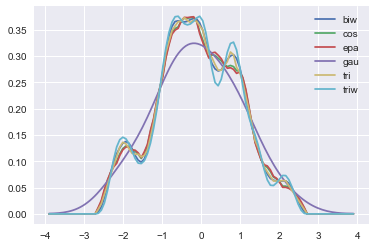

In [11]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

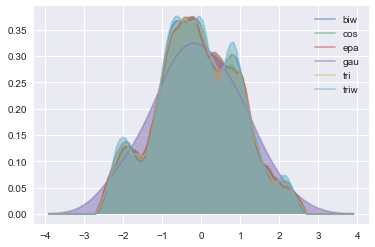

In [12]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

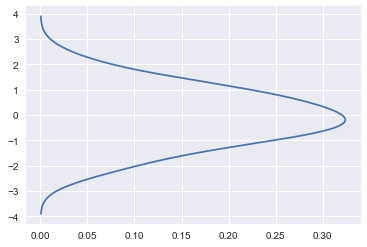

In [15]:
sns.kdeplot(dataset,vertical=True)

(array([  2.,   3.,   6.,  10.,  13.,  17.,  21.,  23.,  24.,  25.]),
 array([ -2.12595759e+00,  -1.70084271e+00,  -1.27572783e+00,
         -8.50612948e-01,  -4.25498066e-01,  -3.83185121e-04,
          4.24731696e-01,   8.49846577e-01,   1.27496146e+00,
          1.70007634e+00,   2.12519122e+00]),
 <a list of 10 Patch objects>)

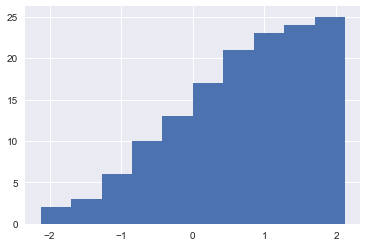

In [17]:
plt.hist(dataset, cumulative=True)

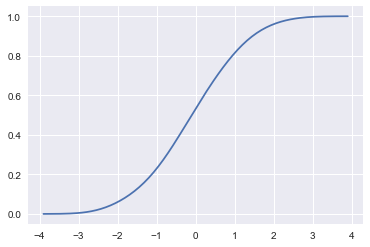

In [14]:
sns.kdeplot(dataset,cumulative=True)

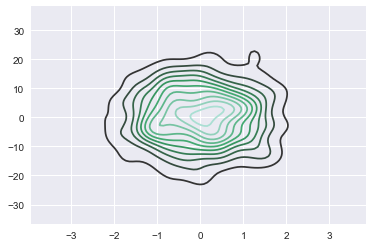

In [19]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])

sns.kdeplot(dframe)

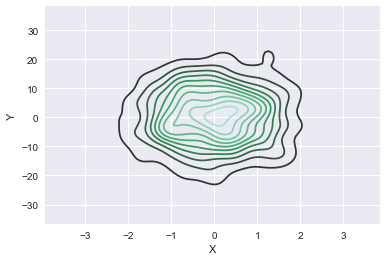

In [20]:
sns.kdeplot(dframe.X,dframe.Y)

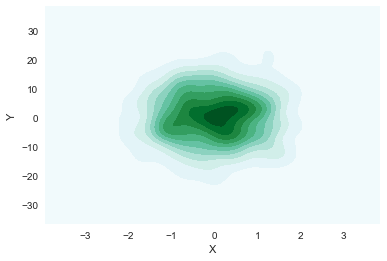

In [22]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

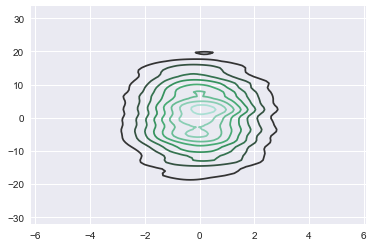

In [23]:
sns.kdeplot(dframe,bw=1)

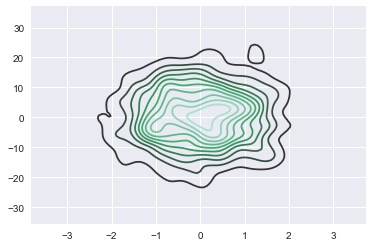

In [25]:
sns.kdeplot(dframe,bw='silverman')

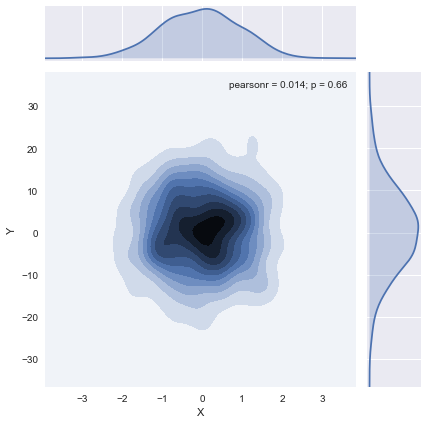

In [27]:
sns.jointplot('X','Y',dframe,kind='kde')